In [108]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pickle
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
data = pd.read_json('/content/drive/MyDrive/coches.net_datos/datos_finales/final_data.json')
data

,color,fuelType,km,make,model,price,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp
0,WHITE,DIÉSEL,180000,VOLKSWAGEN,GOLF,13990,GUIPÚZCOA,AUTOMATIC,2016,PARTICULAR,SEDAN,1598,5,110
1,WHITE,DIÉSEL,34000,VOLKSWAGEN,MULTIVAN,68000,A CORUÑA,MANUAL,2020,PARTICULAR,MINIVAN,1968,5,150
2,RED,DIÉSEL,70000,VOLKSWAGEN,CARAVELLE,36900,ASTURIAS,AUTOMATIC,2021,PROFESIONAL,MINIVAN,1968,4,150
3,GRAY,DIÉSEL,66855,VOLKSWAGEN,TIGUAN,33500,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4,1968,5,150
4,WHITE,GASOLINA,89000,VOLKSWAGEN,POLO,16500,BARCELONA,MANUAL,2015,PROFESIONAL,SEDAN,1798,3,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,WHITE,DIÉSEL,139383,MAZDA,CX5,20900,A CORUÑA,MANUAL,2019,PROFESIONAL,4X4 SUV,2191,5,150
2711,RED,DIÉSEL,69000,MAZDA,CX5,24999,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4 SUV,2191,5,150
2712,WHITE,GASOLINA,63912,MAZDA,MX5,19400,MADRID,MANUAL,2016,PROFESIONAL,CABRIO,1998,2,160
2713,GRAY,DIÉSEL,79000,MAZDA,CX5,17400,CASTELLÓN,AUTOMATIC,2015,PROFESIONAL,4X4 SUV,2191,5,150


In [110]:
campos_numericos = ['km', 'year', 'cubicCapacity', 'doors', 'hp']

campos_categoricos = ['color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType']

all_feature_names = campos_numericos + campos_categoricos

target = 'price'

#used_features = all_feature_names.append(target)
used_features = all_feature_names + [target]

In [111]:
data

,color,fuelType,km,make,model,price,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp
0,WHITE,DIÉSEL,180000,VOLKSWAGEN,GOLF,13990,GUIPÚZCOA,AUTOMATIC,2016,PARTICULAR,SEDAN,1598,5,110
1,WHITE,DIÉSEL,34000,VOLKSWAGEN,MULTIVAN,68000,A CORUÑA,MANUAL,2020,PARTICULAR,MINIVAN,1968,5,150
2,RED,DIÉSEL,70000,VOLKSWAGEN,CARAVELLE,36900,ASTURIAS,AUTOMATIC,2021,PROFESIONAL,MINIVAN,1968,4,150
3,GRAY,DIÉSEL,66855,VOLKSWAGEN,TIGUAN,33500,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4,1968,5,150
4,WHITE,GASOLINA,89000,VOLKSWAGEN,POLO,16500,BARCELONA,MANUAL,2015,PROFESIONAL,SEDAN,1798,3,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,WHITE,DIÉSEL,139383,MAZDA,CX5,20900,A CORUÑA,MANUAL,2019,PROFESIONAL,4X4 SUV,2191,5,150
2711,RED,DIÉSEL,69000,MAZDA,CX5,24999,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4 SUV,2191,5,150
2712,WHITE,GASOLINA,63912,MAZDA,MX5,19400,MADRID,MANUAL,2016,PROFESIONAL,CABRIO,1998,2,160
2713,GRAY,DIÉSEL,79000,MAZDA,CX5,17400,CASTELLÓN,AUTOMATIC,2015,PROFESIONAL,4X4 SUV,2191,5,150


In [112]:
#scaler = MinMaxScaler()
#data[campos_numericos] = scaler.fit_transform(data[campos_numericos])

#max_valor_original = scaler.data_max_[0]
#min_valor_original = scaler.data_min_[0]

data.to_json('/content/drive/MyDrive/coches.net_datos/datos_finales/final_data_scaled.json')

In [113]:
data

,color,fuelType,km,make,model,price,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp
0,WHITE,DIÉSEL,180000,VOLKSWAGEN,GOLF,13990,GUIPÚZCOA,AUTOMATIC,2016,PARTICULAR,SEDAN,1598,5,110
1,WHITE,DIÉSEL,34000,VOLKSWAGEN,MULTIVAN,68000,A CORUÑA,MANUAL,2020,PARTICULAR,MINIVAN,1968,5,150
2,RED,DIÉSEL,70000,VOLKSWAGEN,CARAVELLE,36900,ASTURIAS,AUTOMATIC,2021,PROFESIONAL,MINIVAN,1968,4,150
3,GRAY,DIÉSEL,66855,VOLKSWAGEN,TIGUAN,33500,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4,1968,5,150
4,WHITE,GASOLINA,89000,VOLKSWAGEN,POLO,16500,BARCELONA,MANUAL,2015,PROFESIONAL,SEDAN,1798,3,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,WHITE,DIÉSEL,139383,MAZDA,CX5,20900,A CORUÑA,MANUAL,2019,PROFESIONAL,4X4 SUV,2191,5,150
2711,RED,DIÉSEL,69000,MAZDA,CX5,24999,MADRID,AUTOMATIC,2019,PROFESIONAL,4X4 SUV,2191,5,150
2712,WHITE,GASOLINA,63912,MAZDA,MX5,19400,MADRID,MANUAL,2016,PROFESIONAL,CABRIO,1998,2,160
2713,GRAY,DIÉSEL,79000,MAZDA,CX5,17400,CASTELLÓN,AUTOMATIC,2015,PROFESIONAL,4X4 SUV,2191,5,150


In [114]:
train_data, test_data, _ = np.split(data.sample(frac=1, random_state=123), [int(0.70*len(data)), int(len(data))])

X_train_full, X_test = train_test_split(data[used_features], test_size=0.3, random_state=12)
X_train, X_val = train_test_split(X_train_full, test_size=0.33, random_state=1)

print(len(train_data), len(test_data))
print(len(X_train_full), len(X_test), len(X_train), len(X_val))

1900 815
1900 815 1273 627


In [115]:
y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis=1, inplace=True)
X_val.drop([target], axis=1, inplace=True)
X_test.drop([target], axis=1, inplace=True)

In [116]:
X_val

,km,year,cubicCapacity,doors,hp,color,fuelType,make,model,province,transmissionType,seller_type,bodyType
1601,14270,2022,1998,5,292,WHITE,HÍBRIDO ENCHUFABLE,BMW,X3,CÁDIZ,AUTOMATIC,PROFESIONAL,4X4 SUV
1994,70000,2020,1998,5,165,GARNET,GASOLINA,MAZDA,CX5,GUIPÚZCOA,MANUAL,PROFESIONAL,4X4 SUV
380,100181,2019,1984,5,272,BLACK,GASOLINA,VOLKSWAGEN,ARTEON,MADRID,AUTOMATIC,PROFESIONAL,SEDAN
2030,144059,2016,1998,5,120,RED,GASOLINA,MAZDA,MAZDA3,SEVILLA,MANUAL,PROFESIONAL,BERLINA
1880,45095,2021,1998,5,122,BLUE,HÍBRIDO,MAZDA,CX30,MADRID,MANUAL,PROFESIONAL,4X4 SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,126000,2015,1998,4,120,BLUE,GASOLINA,MAZDA,MAZDA3,MADRID,MANUAL,PARTICULAR,BERLINA
2130,56204,2017,2191,5,150,GARNET,DIÉSEL,MAZDA,CX5,ALMERÍA,MANUAL,PROFESIONAL,4X4 SUV
1769,62000,2016,1998,5,165,RED,GASOLINA,MAZDA,CX5,CASTELLÓN,MANUAL,PROFESIONAL,4X4 SUV
23,22410,2021,1984,5,300,GRAY,GASOLINA,VOLKSWAGEN,TROC,GRANADA,AUTOMATIC,PROFESIONAL,4X4


In [117]:
train_dict = X_train[all_feature_names].to_dict(orient='records')

In [118]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [119]:
model = Sequential()
model.add(Dense(len(X_train[0]), input_shape=(len(X_train[0]),), activation='relu', kernel_initializer="he_uniform"))
model.add(Dense(int(len(X_train[0])/2), activation='relu', kernel_initializer="he_uniform"))
model.add(Dense(1, kernel_initializer="glorot_uniform", activation='linear'))

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='mean_squared_error', optimizer='Adam')

history = model.fit(X_train,y_train, epochs=300, batch_size=768, validation_split=0.2)

Epoch 1/300
2/2 [==============================] - 1s 157ms/step - loss: 607724160.0000 - val_loss: 437197312.0000
Epoch 2/300
2/2 [==============================] - 0s 51ms/step - loss: 407040480.0000 - val_loss: 365827200.0000
Epoch 3/300
2/2 [==============================] - 0s 35ms/step - loss: 358479232.0000 - val_loss: 385299424.0000
Epoch 4/300
2/2 [==============================] - 0s 36ms/step - loss: 390938656.0000 - val_loss: 404417088.0000
Epoch 5/300
2/2 [==============================] - 0s 39ms/step - loss: 412119040.0000 - val_loss: 393112992.0000
Epoch 6/300
2/2 [==============================] - 0s 35ms/step - loss: 395946144.0000 - val_loss: 369238336.0000
Epoch 7/300
2/2 [==============================] - 0s 36ms/step - loss: 366088800.0000 - val_loss: 355873472.0000
Epoch 8/300
2/2 [==============================] - 0s 37ms/step - loss: 350029056.0000 - val_loss: 359225088.0000
Epoch 9/300
2/2 [==============================] - 0s 39ms/step - loss: 348693696.0000 

In [120]:
mse= model.evaluate(X_train, y_train)
print('mse: %.2f' % (mse))

model.history

40/40 [==============================] - 0s 2ms/step - loss: 68462600.0000
mse: 68462600.00


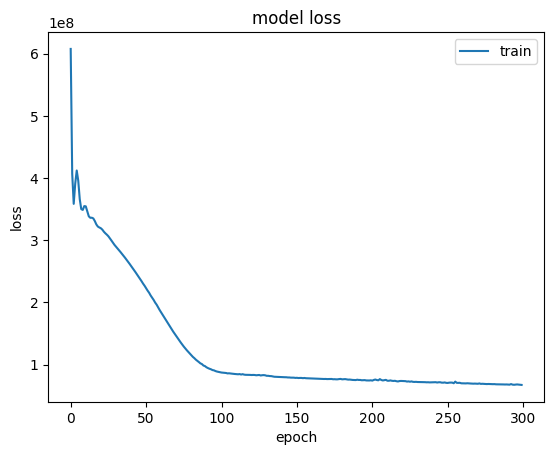

In [121]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

26/26 [==============================] - 0s 2ms/step


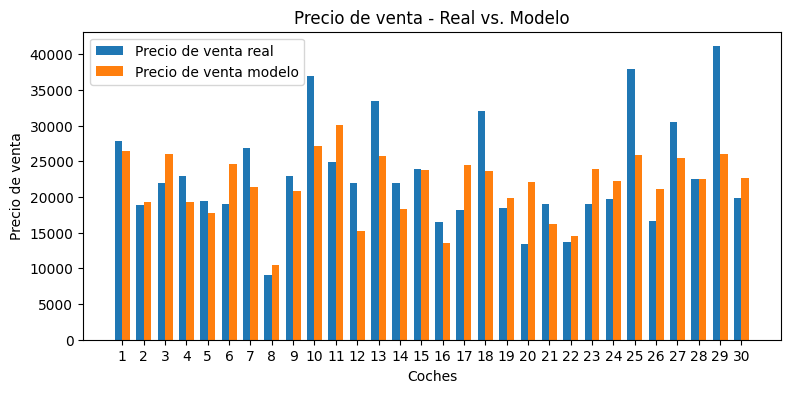

In [122]:
X_test = dv.transform(X_test[all_feature_names].to_dict(orient = 'records'))
y_pred = model.predict(X_test).squeeze()

ind = np.arange(30)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:30], width, label='Precio de venta real')
plt.bar(ind+width, y_pred[:30], width, label='Precio de venta modelo')

plt.xticks(ind+width/2, np.arange(1, 31))
plt.legend(loc='best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()

In [123]:
X_val = X_val.reset_index().drop('index', axis=1)

In [124]:
value = dv.transform(X_val[all_feature_names].loc[0].to_dict())

In [ ]:
i = 2

value = dv.transform(X_val[all_feature_names].to_dict(orient = 'records'))
prediction = model.predict(value)
prediction

In [126]:
valor_original = value * (max_valor_original - min_valor_original) + min_valor_original
print(y_val[i], 'VS', prediction[i])

30290 VS [24350.133]


In [127]:
with open('/content/drive/MyDrive/coches.net_datos/models/model.pkl', 'wb') as f:
  pickle.dump((dv), f)

In [128]:
model.save('/content/drive/MyDrive/coches.net_datos/models/model.hdf5')
model5_read = tf.keras.models.load_model('/content/drive/MyDrive/coches.net_datos/models/model.hdf5')